In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#GROUP-BY : split - apply - combine

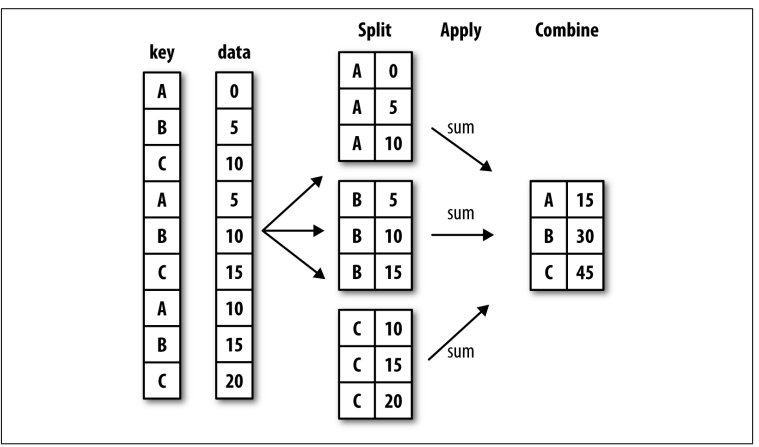

In [ ]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
 'key2' : ['one', 'two', 'one', 'two', 'one'],
 'col1' : [1,10,21,25, 8],
 'col2' : [9,4, 3, 2, 10]
 }) 

In [ ]:
print(df)

  key1 key2  col1  col2
0    a  one     1     9
1    a  two    10     4
2    b  one    21     3
3    b  two    25     2
4    a  one     8    10


In [ ]:
group_one =  df.groupby('key1')
print(type(group_one))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [ ]:
for k1, group in group_one:
  print(k1)
  print(group)

a
  key1 key2  col1  col2
0    a  one     1     9
1    a  two    10     4
4    a  one     8    10
b
  key1 key2  col1  col2
2    b  one    21     3
3    b  two    25     2


In [ ]:
group_one.groups

{'a': [0, 1, 4], 'b': [2, 3]}

In [ ]:
group_one =  df.groupby('key1')
print(group_one.sum())

      col1  col2
key1            
a       19    23
b       46     5


In [ ]:
print(group_one.min())

     key2  col1  col2
key1                 
a     one     1     4
b     one    21     2


In [ ]:
print(group_one.max())

     key2  col1  col2
key1                 
a     two    10    10
b     two    25     3


In [ ]:
print(group_one.count())

      key2  col1  col2
key1                  
a        3     3     3
b        2     2     2


In [ ]:
print(group_one.mean())

           col1      col2
key1                     
a      6.333333  7.666667
b     23.000000  2.500000


In [ ]:
group_one =  df.groupby('key1')[ ['col1','col2'] ]
print(group_one.sum())

      col1  col2
key1            
a       19    23
b       46     5


In [ ]:
group_one =  df.groupby('key1')['col1']
print(group_one.sum())

key1
a    19
b    46
Name: col1, dtype: int64


In [ ]:
group_one =  df['col1'].groupby(df['key1'])
print(group_one.sum())

key1
a    19
b    46
Name: col1, dtype: int64


In [ ]:
group_two =  df.groupby(['key1', 'key2'])

print(group_two.sum())

           col1  col2
key1 key2            
a    one      9    19
     two     10     4
b    one     21     3
     two     25     2


In [ ]:
for (k1, k2), group in group_two:
  print( k1, k2)
  print(group)

a one
  key1 key2  col1  col2
0    a  one     1     9
4    a  one     8    10
a two
  key1 key2  col1  col2
1    a  two    10     4
b one
  key1 key2  col1  col2
2    b  one    21     3
b two
  key1 key2  col1  col2
3    b  two    25     2


In [ ]:
np.linspace(1, 25, num=25).reshape(5,5)

array([[ 1.,  2.,  3.,  4.,  5.],
       [ 6.,  7.,  8.,  9., 10.],
       [11., 12., 13., 14., 15.],
       [16., 17., 18., 19., 20.],
       [21., 22., 23., 24., 25.]])

In [ ]:
people = pd.DataFrame( np.linspace(1, 25, num=25).reshape(5,5),
columns=['a', 'b', 'c', 'd', 'e'],
index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])
print(people)

           a     b     c     d     e
Joe      1.0   2.0   3.0   4.0   5.0
Steve    6.0   7.0   8.0   9.0  10.0
Wes     11.0  12.0  13.0  14.0  15.0
Jim     16.0  17.0  18.0  19.0  20.0
Travis  21.0  22.0  23.0  24.0  25.0


In [ ]:
group_values = {'a': 'red', 'b' : 'blue', 'c':'red', 'd' : 'blue', 'e' : 'red'}

print(group_values)

{'a': 'red', 'b': 'blue', 'c': 'red', 'd': 'blue', 'e': 'red'}


In [ ]:
group_three = people.groupby(group_values, axis=1)
print(group_three.sum())

        blue   red
Joe      6.0   9.0
Steve   16.0  24.0
Wes     26.0  39.0
Jim     36.0  54.0
Travis  46.0  69.0


In [ ]:
print(group_three.min())

        blue   red
Joe      2.0   1.0
Steve    7.0   6.0
Wes     12.0  11.0
Jim     17.0  16.0
Travis  22.0  21.0


#Aggregation

In [ ]:
group_one =  df.groupby('key1')
print(group_one.sum())

      col1  col2
key1            
a       19    23
b       46     5


In [ ]:
df.groupby('key1').agg(
                          {
                              'col1' :[min, max, sum],
                              'col2' : [min, 'count', 'nunique']
                          }
                      )

col1         col2              
      min max sum  min count nunique
key1                                
a       1  10  19    4     3       3
b      21  25  46    2     2       2

In [ ]:
df.groupby('key1').agg(
                            min_col1 = ('col1', min),
                            max_col1 = ('col1', max),
                            sum_col1 = ('col1', sum)
                           
                      )

,min_col1,max_col1,sum_col1
key1,,,
a,1,10,19
b,21,25,46
